### Based on the article: https://realpython.com/python-statistics/
### by Mirko Stojiljković https://realpython.com/team/mstojiljkovic/


# Descriptive statistic basics
### Descriptive statistics describes and summerizes the data
##### Summerising 1 variable: univariate analysis
##### Summerising 2 variable: bivariate analysis
##### Summerising many variable: multivariate analysis



#### Central tendency: Teslls about the center of data; mean, mode, median
#### Variability: Tells how the data is spreaded
#### correlation/Joint variability: Tell about how a pair of variables behavies; covariance, correlation coefficent

#### Outliers: Data samples that significantly vary from the majority of the data in the sample/population

#### Causes: Natural variations, Changes/Errors in the measurement devices


## Calculating the descriptive statistics

In [ ]:
# Imports
import statistics # Python standard statistic lib
import numpy as np
import pandas as pd
import scipy.stats
import math

In [ ]:
# Create some data to work with
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0] # In a dataset "nan" can represent a missing datapoint

In [ ]:
# Create a pandas seriese and numpy array from data
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


## Measure of central tendencies

### Mean
#### Sum of all elements divided by the number of data points
#### also known as: simple mean, simple arithmatic mean, average
#### describes the center of the data

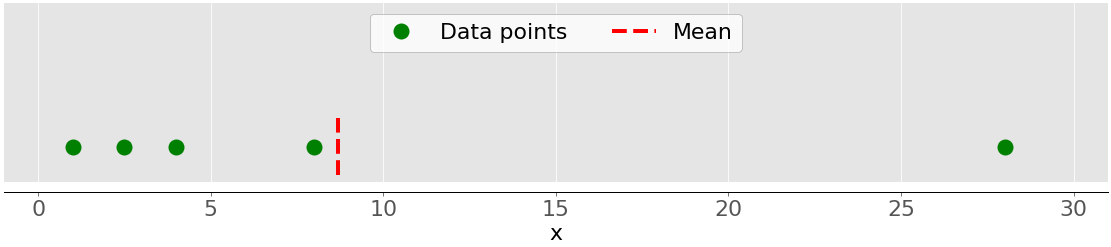

In [ ]:
mean_ = sum(x) / len(x) # sum / length
print(mean_)

8.7


In [ ]:
# python standard statistic library
mean_ = statistics.mean(x)
print(mean_)

8.7


In [ ]:
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [ ]:
# Numpy version
mean_ = y.mean()
print(mean_)
mean_ = np.mean(y)
print(mean_)

8.7
8.7


In [ ]:
mean_ = y_with_nan.mean()
print(mean_)

nan


In [ ]:
# Pandas version
mean_ = z.mean()
print(mean_)
mean_ = z_with_nan.mean()
print(mean_) # Note that pandas ignores the "nan" value

8.7
8.7


### Weighted mean
#### Allows the assign an importance (weight) to each data point when calculating the mean. 
#### for example one can assign the frequency of occurance as weights to calculate the weighted mean
#### e.g: 0.3 * 2 + 0.1 * 5 + 0.4 * 1 + 0.2 * 8
#### weighted mean $= \sum \frac {x_i w_i}{w_i}$
#### usually, the weights selected as $w_i > 0$ and $\sum w_i = 1$


In [ ]:
# Weighted mean calculation
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

wmean = sum(map(lambda x, w: x * w, x, w)) / sum(w)
print(wmean)

6.95


In [ ]:
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

6.95


In [ ]:
# Using Numpy and Pandas
w = [0.1, 0.2, 0.3, 0.25, 0.15]
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
print(wmean)
# Note that when "nan" present the weighted mean result in a nan
y_with_nan = np.array(x_with_nan)
wmean = np.average(y_with_nan, weights=w.put(3, 0.0)) # append 0.0 weight to nan value
print(wmean)
wmean = np.average(z_with_nan, weights=w.put(3, 0.0))
print(wmean)

6.95
nan
nan


### Harmonic Mean
#### Harmonic mean is the reciprocal (inverse) mean of the reciprocals of all data samples
#### desired for situations where the average rate is in interest: https://en.wikipedia.org/wiki/Harmonic_mean
#### Harmonic mean $= \frac {N} {\sum_{i=1}^{N} \frac {1}{x_i}}$; where $N$ is the number of samples

In [ ]:
# Harmonic mean calculation
hmean = len(x) / sum(map(lambda x: 1 / x, x))
print(hmean)
hmean = len(x) / sum(1 / item for item in x)
print(hmean)

2.7613412228796843
2.7613412228796843


In [ ]:
# using statistics library
hmean = statistics.harmonic_mean(x)
print(hmean)
# when nan is present
hmean = statistics.harmonic_mean(x_with_nan)
print(hmean)

2.7613412228796843
nan


In [ ]:
# using scipy statistics library
hmean_ = scipy.stats.hmean(x)
print(hmean_)
# hmean_ = scipy.stats.hmean(x_with_nan) # ERROR; not defined for nan

2.7613412228796843


### Median
#### The median is the middle element of the sorted dataset
#### If the number of samples are odd, its the value at middle position $0.5(N+1)$
#### if the number of samples are even, its the arithmatic mean of the values at $0.5N$ and $(0.5n)+1$

#### e.g: take the dataset $2,4,1,8,9$
#### when sorted; $1,2,4,8,9$ median is the 3rd value 4
#### when one number is removed; $1,2,4,8$; median is $\frac {2 + 4} {2} = 3$

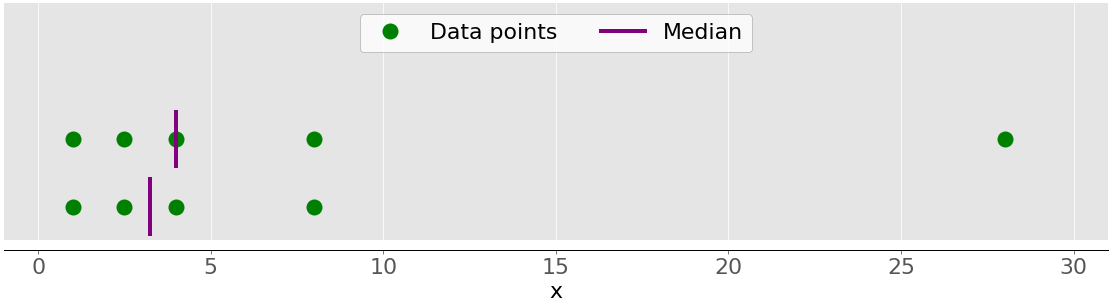

#### Dataset: $(1, 2.5, 4, 8, 28)$; 28 is the outliear and top set has a median of 4. When the outlier is removed (bottom set), the median becomes 3.25

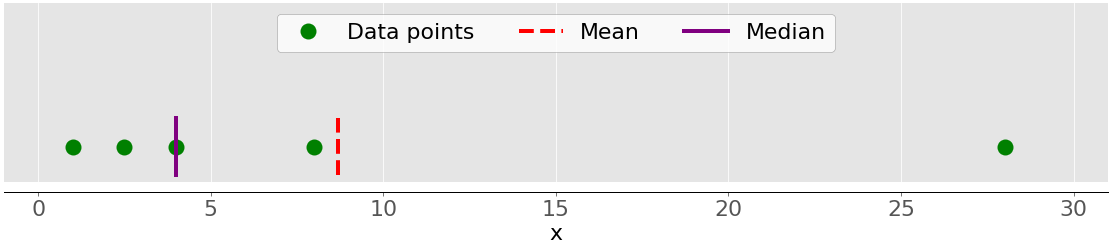

#### image above shows the mean and the median
#### mean is usually heavily affected by the outliers, but the median is slightly or not at all affected

#### e.g: image below

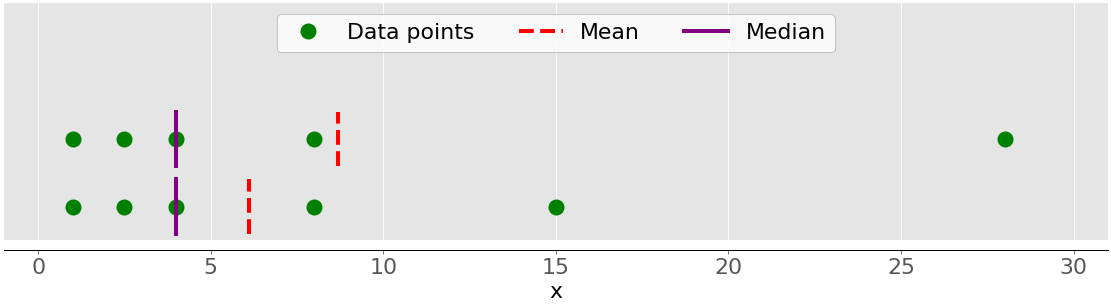

In [ ]:
# median using statistics library
median_ = statistics.median(x)
print(sorted(x))
print(median_)
# without the outlier
median_ = statistics.median(x[:-1])
print(median_)

[1, 2.5, 4, 8.0, 28.0]
4
3.25


In [ ]:
# numpy version
median_ = np.median(y)
print(median_)
median_ = np.median(y[:-1])
print(median_)

# For datasets with missing values (nan)
median_ = np.nanmedian(y_with_nan)
print(median_)

4.0
3.25
4.0


In [ ]:
# Pandas version
median_ = z.median()
print(median_)
median_ = z_with_nan.median()
print(median_)

4.0
4.0


### Mode
#### Mode is the most frequently occured value in a dataset
#### If there is no mode, the data distribution is more likely a multimodal distribution


In [ ]:
# Computing mode in a dataset
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
print(mode_)
a = [(u.count(item), item) for item in set(u)]
print(a)

2
[(1, 8), (2, 2), (1, 3), (1, 12)]


In [ ]:
# python statistics library
mode_ = statistics.mode(u)
print(mode_)

2


In [ ]:
# Colab multimode doesnt work

In [ ]:
# Scipy stat version
u = np.array(u)
v = np.array([2, 3, 2, 8, 12, 3, 3, 2, 3])
mode_ = scipy.stats.mode(u)
print(mode_)
mode_ = scipy.stats.mode(v)
print(mode_)

ModeResult(mode=array([2]), count=array([2]))
ModeResult(mode=array([3]), count=array([4]))


In [ ]:
# Pandas version
u = [2, 3, 2, 8, 12]
u_with_nan = u
u_with_nan.append(math.nan)
u = pd.Series(u)
u_with_nan = pd.Series(u_with_nan)
# print(u)
# print(u_with_nan)
mode_ = u.mode()
print(mode_)
mode_ = u_with_nan.mode() # can calculate with nan values
print(mode_)

0    2.0
dtype: float64
0    2.0
dtype: float64


In [ ]:
# Multimode pure python version
u_multimode = [2, 3, 2, 8, 12, 11, 9, 28, 3, 3, 2, 8, 2, 3, 2]
#  lambda <arguments> : <value_1> if <condition> else <value_2>
get_modes = lambda x : True if x[0] > 2 else False
# print([(u_multimode.count(item), item) for item in set(u_multimode)])
# functional
multimode_ = list(
              map(
                  lambda x: x[1], 
                  (filter(
                      get_modes, 
                      [(u_multimode.count(item), item) for item in set(u_multimode)]
                    )
                  )
                )
              )
print(multimode_)
# EXERCISE: TRY TO CONVERT THIS FUNCTION TO A FUNCTION WITH NESTED FOR-LOOPS

[2, 3]


## Measure of variance

### Measure of variance addresses the spread of the data using different measurements such as variance, standard deviation, skewness, percentile and range

### Variance
#### Numerically shows how far a data point, from its mean. So the spread of the data
#### The sample variance for a dataset x with N samples can be calculated using the following equation:
#### sample variance $= \frac {\sum_{i=1}^{N} (x_i - mean(x))^2}{N-1}$

#### alway a positive value
#### Measures the spread as the average of squared deviation
#### squraring weighs outliers heavily 

In [ ]:
N = len(x)
mean_ = sum(x) / N
var_ = sum((item - mean_)**2 for item in x) / (N - 1)
print(var_)

123.19999999999999


In [ ]:
# With statistics library
var_ = statistics.variance(x)
print(var_)
# can't handle missing data
var_ = statistics.variance(x_with_nan)
print(var_)

# Population variance
var_ = statistics.pvariance(x)
print(var_)

123.2
nan
98.56


In [ ]:
# Numpy version
var_ = np.var(x, ddof=1) # ddof: delta degrees of freedom; N - ddof; default ddof=0; ddof = 1 for sample variance; 0 for population variance
print(var_)
# For missing values
var_ = np.var(x_with_nan, ddof=1)
print(var_) # doesnt work
# use nanvar for missing values
var_ = np.nanvar(x, ddof=1)
print(var_)

# Population variance
var_ = np.var(x, ddof=0)
print(var_)

123.19999999999999
nan
123.19999999999999
98.55999999999999


In [ ]:
# Pandas version
var_ = z.var()
print(var_)
# with missing values
var_ = z_with_nan.var()
print(var_)

123.19999999999999
123.19999999999999


### Normal Distribution
#### Following cell plots a normal distribution
#### $N = \frac {e^{\frac {-(x-\mu)^2} {2 \sigma^2}}}{\sigma \sqrt {2 \pi}}$

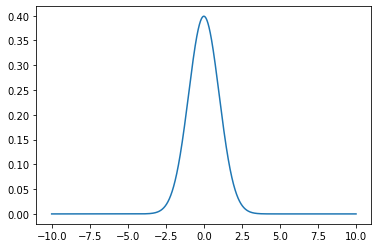

In [53]:
# A normal distribution using scipy stat
from scipy.stats import norm
import matplotlib.pyplot as plt

x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,1)) # xaxis, mean, standard deviation
plt.show()

### Standard deviation
#### Standard deviation is the square root of the variance
#### It measures the spread of the distribution around the mean
#### Gives the spread in the same units as the random variable (square root of the squared value (variance))

#### $\sigma = \sqrt {variance}$

In [55]:
# Using pure python
stdv_ = var_ ** 0.5
print(stdv_)

11.099549540409285


In [56]:
# Using statistics library
stdv_ = statistics.stdev(x)
print(stdv_)

11.099549540409287


In [62]:
# numpy version
stdv_ = np.std(x, ddof=1)
print(stdv_)
stdv_ = y.std(ddof=1)
print(stdv_)

# Cant handle missing values
stdv_ = y_with_nan.std(ddof=1)
print(stdv_)

# NaN version
stdv_ = np.nanstd(y_with_nan, ddof=1)
print(stdv_)

11.099549540409285
11.099549540409285
nan
11.099549540409285


In [63]:
# Pandas version
stdv_ = z.std(ddof=1)
print(stdv_)

# Handling NaN
stdv_ = z_with_nan.std(ddof=1)
print(stdv_)

11.099549540409285
11.099549540409285


### Skewness
#### Skewness indicates how asymetrically the data is spreaded
#### When data is more towards left, its negative skew
#### When data is more towards right, its positive skew
#### skewness $ = \frac {\sum_{i}(x_i - \mu)^3 n} {(n-1)(n-2)s^3}$ ; adjusted Fisher-Pearson standardized moment coefficient.

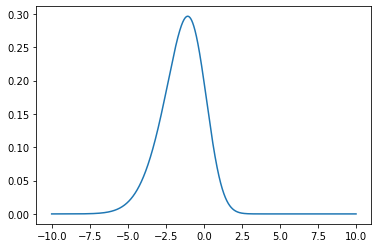

In [87]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt

x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, skewnorm.pdf(x_axis, -2, 0, 2)) # Negative skewed normal distribution
plt.show()

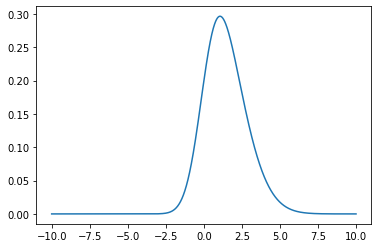

In [70]:

x_axis = np.arange(-10, 10, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, skewnorm.pdf(x_axis, 2, 0, 2)) # Positive skewed normal distribution
plt.show()

In [73]:
# Skewness in pure python
skew_ = sum((item - mean_) ** 3 for item in x) * N / ((N-1)*(N-2)*stdv_ ** 3)
print(skew_)

1.9470432273905929


In [74]:
# Scipy stat version
skew_ = scipy.stats.skew(x, bias=False)
print(skew_)

1.9470432273905927


In [79]:
# Pandas version
skew_ = z.skew()
print(skew_)

# with NaNs
skew_ = z_with_nan.skew()
print(skew_)

1.9470432273905924
1.9470432273905924


In [119]:
x_left = [8, 2.5, 1, 4, -28]
skew_ = scipy.stats.skew(x_left, bias=False)
print(skew_)

-2.051199337479691
